In [34]:
# %pip install pandas
# %pip install numpy
# %pip install scikit-learn
# %pip install matplotlib
# %pip install seaborn
#% pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import scipy
import numpy as np
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
games_details = pd.read_csv('games_details.csv')
games  = pd.read_csv('games.csv')

First lets have an initial overview on the data

In [3]:
games_details.iloc[:5,].T

,0,1,2,3,4
GAME_ID,22200477,22200477,22200477,22200477,22200477
TEAM_ID,1610612759,1610612759,1610612759,1610612759,1610612759
TEAM_ABBREVIATION,SAS,SAS,SAS,SAS,SAS
TEAM_CITY,San Antonio,San Antonio,San Antonio,San Antonio,San Antonio
PLAYER_ID,1629641,1631110,1627751,1630170,1630200
PLAYER_NAME,Romeo Langford,Jeremy Sochan,Jakob Poeltl,Devin Vassell,Tre Jones
NICKNAME,Romeo,Jeremy,Jakob,Devin,Tre
START_POSITION,F,F,C,G,G
COMMENT,NaN,NaN,NaN,NaN,NaN
MIN,18:06,31:01,21:42,30:20,27:44


In [4]:
games_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

Let's investigate whether NaN values in the MIN column indicate that a player did not participate in a game

In [5]:
games_details.loc[games_details.MIN.isna()].sample(10)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
523875,41500111,1610612761,TOR,Toronto,1626153,Delon Wright,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36575,22100467,1610612740,NOP,New Orleans,1630230,Naji Marshall,Naji,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617480,21300479,1610612749,MIL,Milwaukee,202327,Ekpe Udoh,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225440,20500636,1610612750,MIN,Minnesota,2058,Mark Madsen,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321414,21100515,1610612752,NYK,New York,1710,Mike Bibby,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377588,20900974,1610612756,PHX,Phoenix,101112,Channing Frye,NaN,NaN,NWT - NBA Suspension,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
663962,21200075,1610612760,OKC,Oklahoma City,202732,DeAndre Liggins,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640889,21200987,1610612746,LAC,Los Angeles,2584,Willie Green,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627392,21300092,1610612742,DAL,Dallas,203495,Ricky Ledo,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225656,20500629,1610612750,MIN,Minnesota,2770,Justin Reed,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Base on the table abouve its looks like that is the case. Since the "MIN" column is currently in a text format, we'll need to convert it to a numeric format to perform any meaningful calculations or analysis

In [6]:
games_details.MIN = games_details.MIN.fillna("0")
problematics_min_rows = games_details.loc[games_details.MIN.str.contains(r'\.')]
splited_valus = problematics_min_rows.MIN.str.split(r"[\.:]", expand=True)
games_details.loc[splited_valus.index,'MIN'] = splited_valus.iloc[:,0] + ':' + splited_valus.iloc[:,2]
splited_minutes = games_details.MIN.str.split(':', expand=True).fillna("0")
games_details.MIN = splited_minutes.iloc[:,0].str.slice(stop=2).astype(int) + splited_minutes.iloc[:,1].str.slice(stop=2).astype(int) / 60.0
games_details.MIN

0         18.100000
1         31.016667
2         21.700000
3         30.333333
4         27.733333
            ...    
668623    19.000000
668624    23.000000
668625    15.000000
668626    19.000000
668627    27.000000
Name: MIN, Length: 668628, dtype: float64

Since NaN values in the numeric stats columns indicate that a player didn't participate in the game, it makes sense to fill those values with zero.

In [7]:
float_cols = games_details.select_dtypes(include=['float64'])
games_details.loc[:, float_cols.columns] = float_cols.fillna(0)

Now, I'll clean up the data a bit by removing players who don't have enough playing time or games to be statistically significant. I've decided to exclude players with less than ten total minutes of play or those who participated in fewer than six games.

In [8]:

no_information_players = games_details.groupby('PLAYER_ID').MIN.apply(lambda x: x.sum() < 10 or x.size < 6)
playing_players = no_information_players[~no_information_players].index
games_details = games_details.loc[games_details.PLAYER_ID.isin(playing_players)]
print(f'removed {no_information_players.sum()} players')

removed 551 players


 Note: In such cases, where there's insufficient data on certain players, it's common practice to use data from similar players to perform analyses on these less-represented individuals

Alright, to get a feel for the relationships between different stats, we'll start by checking if there's any monotonic relationship between two specific stats across all players

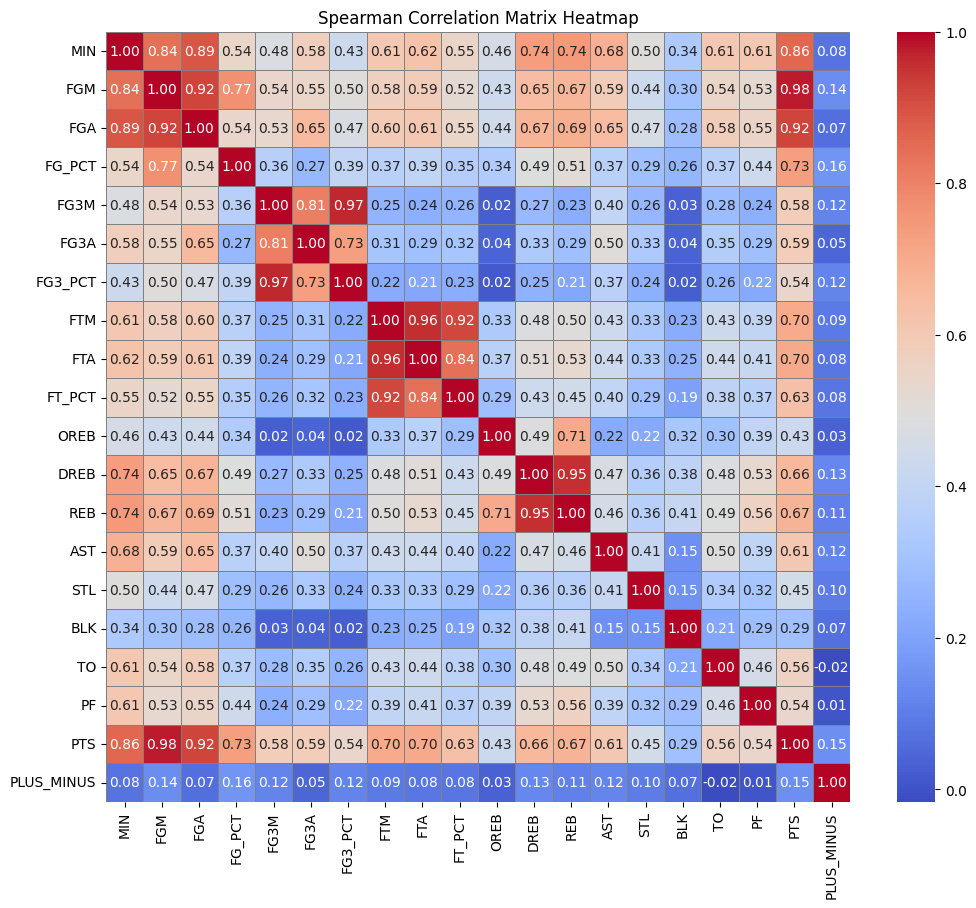

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
spearman_corr_matrix = games_details[float_cols.columns].corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, linewidths=0.5, linecolor='gray')
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

Given the subtle yet noticeable monotonic relationship, evidenced by a Spearman correlation of 0.61, I've chosen to explore whether a higher number of assists—which indicates increased passing—might correlate with lower scoring. For this analysis, Points Scored (PTS) will serve as the target variable and Assists (AST) as the explanatory variable

In [10]:
def plot_histogram_and_stats(data, bins=50):
    """
    Plots a histogram of the specified column in the DataFrame and prints and annotates the plot
    with the kurtosis and skewness.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, alpha=0.7, color='blue')
    plt.title(f'Histogram of {data.name}')
    plt.xlabel(data.name)
    plt.ylabel('Frequency')
    
    kurt = data.kurtosis()
    skew = data.skew()

    plt.suptitle(f'Kurtosis: {kurt:.2f}, Skewness: {skew:.2f}', fontsize=10, y=0.95)
    
    plt.grid(True)
    plt.show()

To deepen our understanding, let's also include histograms for the Minutes Played (MIN) Points Scored (PTS) and Assists (AST)

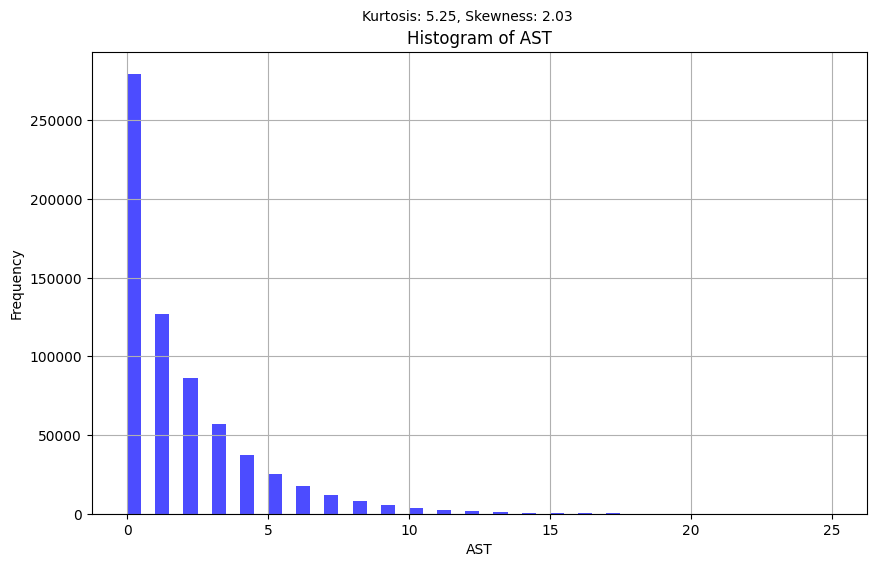

In [11]:
plot_histogram_and_stats(games_details.AST)

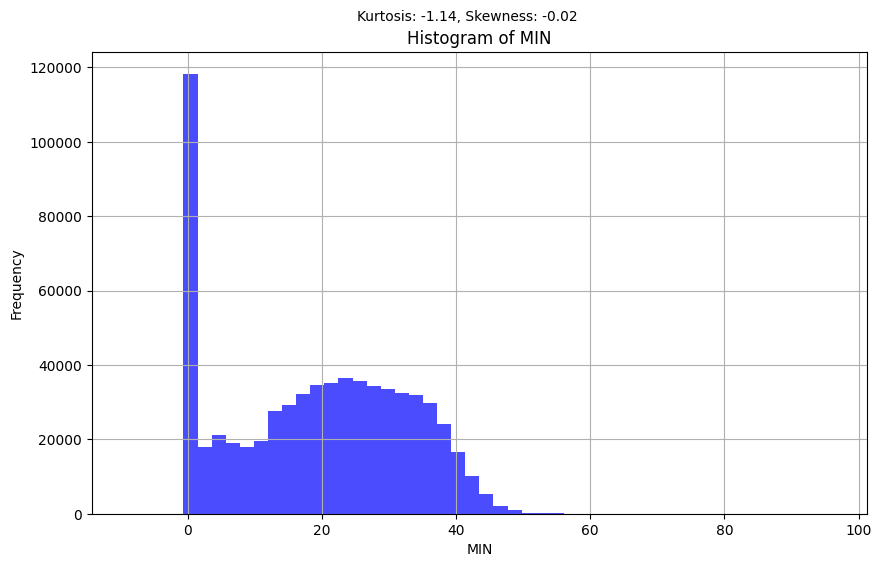

In [12]:
plot_histogram_and_stats(games_details.MIN)

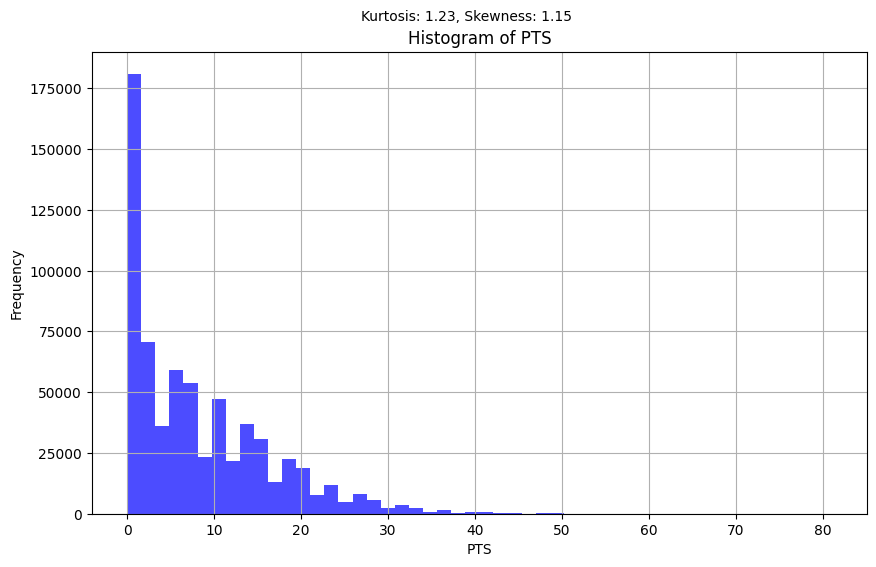

In [13]:
plot_histogram_and_stats(games_details.PTS)

Both the Points Scored (PTS) and Assists (AST) data display characteristics typical of long-tail asymmetric distributions, such as geometric or exponential, often characterized by a gamma parameter. This pattern suggests that while most players score low points and assists, there are a few outliers with exceptionally high values. The distribution for Minutes Played (MIN), however, appears relatively symmetric, except for a significant segment of players who did not play at all, indicated by a mode of zero for all distributions. This shows that although many players have similar playing times, a considerable number do not participate in games

Before moving forward, let's make sure that the game IDs go up in order, indicating that games with higher IDs happened later.

In [14]:
games.sample(10).sort_values('GAME_ID')

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
12836,2008-02-12,20700761,Final,1610612748,1610612743,2007,1610612748,113.0,0.470,0.846,...,31.0,46.0,1610612743,114.0,0.474,0.800,0.364,21.0,49.0,0
11373,2009-02-17,20800788,Final,1610612754,1610612755,2008,1610612754,100.0,0.494,0.765,...,20.0,50.0,1610612755,91.0,0.385,0.655,0.133,20.0,45.0,1
8914,2010-12-20,21000413,Final,1610612744,1610612745,2010,1610612744,112.0,0.512,0.704,...,29.0,35.0,1610612745,121.0,0.500,0.765,0.458,31.0,45.0,0
7940,2011-12-30,21100049,Final,1610612746,1610612741,2011,1610612746,101.0,0.513,0.600,...,26.0,31.0,1610612741,114.0,0.500,0.853,0.412,29.0,45.0,0
5107,2013-12-04,21300274,Final,1610612762,1610612754,2013,1610612762,86.0,0.413,0.889,...,21.0,40.0,1610612754,95.0,0.476,0.800,0.188,24.0,41.0,0
4498,2014-03-01,21300875,Final,1610612755,1610612764,2013,1610612755,103.0,0.452,0.688,...,22.0,40.0,1610612764,122.0,0.506,0.714,0.462,33.0,44.0,0
24851,2015-12-03,21500277,Final,1610612748,1610612760,2015,1610612748,97.0,0.494,0.583,...,25.0,35.0,1610612760,95.0,0.443,0.875,0.250,15.0,44.0,1
23709,2016-10-26,21600005,Final,1610612754,1610612742,2016,1610612754,130.0,0.505,0.765,...,30.0,52.0,1610612742,121.0,0.433,0.722,0.375,26.0,49.0,1
22710,2017-03-15,21601005,Final,1610612754,1610612766,2016,1610612754,98.0,0.534,0.889,...,26.0,42.0,1610612766,77.0,0.400,0.769,0.130,15.0,30.0,1
19711,2019-04-20,41800173,Final,1610612762,1610612745,2018,1610612762,101.0,0.416,0.658,...,21.0,48.0,1610612745,104.0,0.384,0.676,0.333,19.0,52.0,0


Great! looks like that the case

## model part

In [127]:
selected_stats = ['GAME_ID','PLAYER_ID','MIN','PTS','AST']

In [128]:
games_details_stats = games_details[selected_stats]
games_details_stats['ATS_INTERACTION_MIN'] = games_details_stats['AST'] * games_details_stats['MIN']
games_details_stats = games_details_stats.sort_values(by=['PLAYER_ID', 'GAME_ID'])
games_details_stats

,GAME_ID,PLAYER_ID,MIN,PTS,AST,ATS_INTERACTION_MIN
306591,10300016,15,5.000000,13.0,0.0,0.000000
275884,10400078,15,5.000000,3.0,0.0,0.000000
275614,10400089,15,5.000000,8.0,1.0,5.000000
275311,10400101,15,5.000000,3.0,2.0,10.000000
242219,10500058,15,20.000000,6.0,1.0,20.000000
...,...,...,...,...,...,...
2867,22200372,1631323,19.566667,18.0,1.0,19.566667
952,22200442,1631323,14.866667,2.0,1.0,14.866667
455,22200452,1631323,10.316667,3.0,0.0,0.000000
334,22200461,1631323,5.066667,0.0,0.0,0.000000


I developed a heuristic model to analyze basketball performance, focusing on the selected stats which are minutes played, assists, and I added their interaction feature. This interaction is the  product of minutes played and assists, capturing the relation between them both.

The core of the model is built on three primary features: minutes played, assists, and their interaction. For each of these features, I created historical features for each player by segmenting their performance data into bins based on the ranges within these features. Within each bin, I calculated the historical average of the target value, points scored (PTS), thereby generating predictions for each player.

To provide a comprehensive analysis, I deployed two types of historical features:

Historical Feature: This aggregates the data from all previous games up to the current game for each player, providing a long-term view of the player's performance trends over their entire history. This includes insights into consistent patterns or long-term improvements in performance.
Last 7 Games Historical Feature: This complements the broader perspective by focusing specifically on the most recent 7 games. It analyzes the interaction terms from these recent games to provide a snapshot of current form and recent performance trends, capturing short-term fluctuations that may not be reflected in the longer historical view.
For each game, the model utilizes these two historical lenses to generate a total of six predictions per sample:

Three predictions derive from the Historical Feature, including historical average points for bins corresponding to the player's minutes played, assists, and their interaction.
Three additional predictions come from the Last 7 Games Historical Feature, which also provides historical averages but confines the analysis to data from the player's most recent games. (This window of 7 was chosen based on the typical NBA schedule, where players often participate in 2-3 games per week, making it a representative sample of recent form.)
For the final prediction, I used a weighted average of those six features per sample, where the weights were determined by the Standard Error of the Mean (SEM) of each bin's observations. This method ensures that predictions with lower SEM, indicating more reliable averages, have a greater influence on the final outcome.

For example, consider a scenario where a player played 10 minutes and had 2 assists. The model performs the following steps to generate predictions:

Identifies the bin that includes 10 minutes from the 'minutes played' historical data and calculates the historical features for this bin.
Locates the bin for 2 assists in the 'assists' historical data and computes the historical features for this bin.
Determines the bin for the interaction value of 20 (the product of minutes played and assists) and finds the historical features for this interaction bin.
After these predictions are calculated, the model then combines them into a final prediction using a weighted sum.


In [129]:
games_details_stats.groupby('PLAYER_ID').AST.nunique().value_counts()

AST
3     266
5     246
4     232
6     223
7     204
2     192
8     162
9     126
10     88
11     72
12     70
13     52
16     43
1      39
15     38
14     31
17     17
19     12
18     10
21      4
20      4
24      2
22      2
25      1
Name: count, dtype: int64

The function responsible for creating player-asissts bins.
Includes a hyperparameter: maximum_nbins, for which I've selected a maximum value of 4. This choice is based on analyzing the distribution of unique assist counts per player

In [130]:
def bin_assists_by_unique_values(player_data, maximum_nbins=4):
    """
    Categorizes assist data into bins for each player based on the unique values of assists.
    """
    unique_assists = player_data['AST'].unique()
    n_unique = len(unique_assists)

    if n_unique == 1:
        player_data['assist_bins'] = 'Single Value'
    else:
        n_bins = min(n_unique, maximum_nbins)
        quantiles = player_data['AST'].quantile(np.linspace(0, 1, n_bins + 1)).round().unique()
        
        if len(quantiles) == 1:
            bin_edges = [-np.inf] + sorted(unique_assists) + [np.inf]
        else:
            bin_edges = sorted(set([-np.inf] + list(quantiles) + [np.inf]))
        
        player_data['assist_bins'] = pd.cut(player_data['AST'], bins=bin_edges, labels=False, include_lowest=True)
    
    return player_data


binned_ast_data = games_details_stats.groupby('PLAYER_ID').apply(bin_assists_by_unique_values)


The function that makes bins for player minutes.
Includes a hyperparameter: num_quantiles. I picked quartiles for this setting because it helps divide the data well and still keeps enough examples in each group

In [131]:
def bin_minutes_by_quartiles(player_data, num_quantiles = 4):
    """ sing qcut to create quartile bins on the minutes column """
    player_data['minutes_bins'] = pd.qcut(player_data['MIN'], q=num_quantiles,labels=False,duplicates='drop')
    return player_data

binned_minutes_data = games_details_stats.groupby('PLAYER_ID').apply(bin_minutes_by_quartiles)

In [132]:
games_details_stats.groupby('PLAYER_ID').GAME_ID.size().describe(np.arange(0,1.1,0.1))

count    2136.000000
mean      312.212547
std       334.149598
min         6.000000
0%          6.000000
10%        15.000000
20%        35.000000
30%        74.000000
40%       113.000000
50%       181.000000
60%       267.000000
70%       393.000000
80%       577.000000
90%       835.000000
100%     1795.000000
max      1795.000000
Name: GAME_ID, dtype: float64

The function that bins the interaction variable includes a hyperparameter, maximum_nbins, for which I have selected a maximum of 6 bins. I belive that the interaction feature has high variance across the dataset, suggesting that it can reveal interesting connections. Additionally, by limiting the number of bins to six, I aim to ensure that each bin contains enough samples to be statistically meaningful

In [133]:
def bin_interaction_by_quantiles(player_data, maximum_nbins=6):
    """
    Categorizes interaction data between assists and minutes played into bins for each player based on the distribution of values.
    """
    zeros = player_data[player_data['ATS_INTERACTION_MIN'] == 0]
    non_zeros = player_data[player_data['ATS_INTERACTION_MIN'] != 0]
    
    zeros['interaction_bins'] = 'Zero'

    if not non_zeros.empty:
        n_bins = min(maximum_nbins, non_zeros['ATS_INTERACTION_MIN'].nunique())  # For quartiles
        quantiles = non_zeros['ATS_INTERACTION_MIN'].quantile(np.linspace(0, 1, n_bins + 1))
        
        bin_edges = sorted(set([-np.inf] + list(quantiles) + [np.inf]))
        bin_labels = [f'Quartile {i}' for i in range(1, len(bin_edges))]
        
        non_zeros['interaction_bins'] = pd.cut(non_zeros['ATS_INTERACTION_MIN'], bins=bin_edges, labels=False, include_lowest=True)
    else:
        non_zeros['interaction_bins'] = pd.Series([], dtype='category')

    binned_interaction = pd.concat([zeros, non_zeros])

    return binned_interaction

binned_intersection_data = games_details_stats.groupby('PLAYER_ID').apply(bin_interaction_by_quantiles)


joining the bins to our stats table

In [134]:
games_details_with_bins = games_details_stats.join(binned_minutes_data.minutes_bins.reset_index(level=0, drop=True))\
                                             .join(binned_ast_data.assist_bins.reset_index(level=0, drop=True))\
                                             .join(binned_intersection_data.interaction_bins.reset_index(level=0, drop=True))

The function calculates historical averages and SEM for any specified column, ensuring that for each sample, only the data from previous entries are considered. This method allows the function to accurately compute historical metrics that reflect the information available up to but not including the current sample

In [135]:
def calculate_historical_stats(group, column, window):
    """
    Calculates historical statistics for 'PTS' in a pandas DataFrame group,
    specifically computing the rolling mean and SEM for the specified number of games up to but
    not including the current one, sorted by game ID.

    Parameters:
    group (DataFrame): Grouped data frame segment per player.
    column (str): The column name on which to perform the calculations, typically 'PTS'.
    window (int, optional): The number of games to include in the rolling window. If None, use all available games.

    Returns:
    DataFrame: Returns a DataFrame with historical mean and SEM for the column.
    """
    window_str = 'SHORT' if window else 'LONG'
    group = group.sort_values(by='GAME_ID')
    
    if window:
        historical_mean = group[column].rolling(window=window, min_periods=1).mean().shift(1)
        
        historical_sem = group[column].rolling(window=window, min_periods=1).sem().shift(1)
    else:
        historical_mean = group[column].expanding(min_periods=1).mean().shift(1)
        
        historical_sem = group[column].expanding(min_periods=1).sem().shift(1)
    
    results = pd.DataFrame({
        f'{window_str}_{column}_HISTORICAL_MEAN': historical_mean,
        f'{window_str}_{column}_HISTORICAL_SEM': historical_sem
    })

    return results

Below, I've set up the calculation for historical features. For each of the three bins, I am determining the average (avg) and the standard error of the mean (SEM) based on the historical data of the target value.

Note: This computation might take a few minutes to complete, especially on older CPUs. Now would be a great time to grab a snack or a coffee while you wait for the results!

In [136]:
historical_features = []
nlast_games = 7
for params in list(itertools.product([['PLAYER_ID','minutes_bins'],['PLAYER_ID','assist_bins'],['PLAYER_ID','interaction_bins']], ['PTS'], [None, nlast_games])):
    grouped_columns, value_column, window = params
    pl_id, bins = grouped_columns
    historical_results = games_details_with_bins.groupby(grouped_columns).apply(calculate_historical_stats,column=value_column, window=window)
    historical_to_concat = historical_results.reset_index(level=grouped_columns,drop=True)
    historical_features.append(historical_to_concat.add_suffix('_by_' + bins))

In [137]:
concatinated_featues = pd.concat(historical_features,axis=1)
concatinated_featues

,LONG_PTS_HISTORICAL_MEAN_by_minutes_bins,LONG_PTS_HISTORICAL_SEM_by_minutes_bins,SHORT_PTS_HISTORICAL_MEAN_by_minutes_bins,SHORT_PTS_HISTORICAL_SEM_by_minutes_bins,LONG_PTS_HISTORICAL_MEAN_by_assist_bins,LONG_PTS_HISTORICAL_SEM_by_assist_bins,SHORT_PTS_HISTORICAL_MEAN_by_assist_bins,SHORT_PTS_HISTORICAL_SEM_by_assist_bins,LONG_PTS_HISTORICAL_MEAN_by_interaction_bins,LONG_PTS_HISTORICAL_SEM_by_interaction_bins,SHORT_PTS_HISTORICAL_MEAN_by_interaction_bins,SHORT_PTS_HISTORICAL_SEM_by_interaction_bins
207147,NaN,NaN,NaN,NaN,6.333333,4.082483,6.333333,4.082483,6.333333,4.082483,6.333333,4.082483
293586,0.00,NaN,0.00,NaN,4.619048,0.887345,4.000000,1.943651,4.619048,0.887345,4.000000,1.943651
293119,0.00,0.000000,0.00,0.000000,4.409091,0.871985,2.000000,0.816497,4.409091,0.871985,2.000000,0.816497
292557,0.00,0.000000,0.00,0.000000,4.217391,0.855117,1.571429,0.845154,4.217391,0.855117,1.571429,0.845154
292259,0.00,0.000000,0.00,0.000000,4.041667,0.837403,1.142857,0.830949,4.041667,0.837403,1.142857,0.830949
...,...,...,...,...,...,...,...,...,...,...,...,...
6053,10.00,1.870829,10.00,1.870829,4.500000,6.363961,4.500000,6.363961,NaN,NaN,NaN,NaN
3791,8.25,2.374634,8.25,2.374634,3.750000,2.179449,3.750000,2.179449,9.000000,NaN,9.000000,NaN
3544,8.40,1.788854,8.40,1.788854,4.800000,2.012461,4.800000,2.012461,NaN,NaN,NaN,NaN
2867,7.50,1.737815,7.50,1.737815,4.500000,1.643168,4.500000,1.643168,NaN,NaN,NaN,NaN


here i selected the means calculation which are the predicted values, and combine them with the stats table

In [138]:
prediction_df = concatinated_featues.filter(like='MEAN')
prediction_df = prediction_df.fillna(0)
prediction_df.columns = ['y_hat_long_by_min','y_hat_short_by_min','y_hat_long_by_ast', 
                         'y_hat_short_by_ast', 'y_hat_long_by_inter','y_hat_short_by_inter']
games_details_stats_with_predictions = games_details_stats.join(prediction_df,how='left')


In this step, I am extracting the calculated SEM values, which indicate the reliability of the average estimates. Higher SEM values suggest that the average is less precise, reflecting greater variability among the samples. To calculate the final predicted value, y_pred, I use weighted values inversely proportional to the SEM. This means predictions with higher SEM receive lower weight in the final prediction, ensuring that more reliable (lower SEM) predictions have a greater influence on the outcome. Since the SEM was calculated consistently across the same variable, I am not scaling the SEM values before applying them as weights

In [139]:
sems_df = concatinated_featues.filter(like='SEM')
sums = sems_df.sum(axis=1).to_frame()
opposite_weight_sems = pd.DataFrame((sums.values - sems_df.values),columns=['weights_minutes_long','weights_minutes_short',
                                                                            'weights_ast_long','weights_ast_short',
                                                                            'weights_both_long','weights_both_short']
                                                                            ,index=sems_df.index)
opposite_weight_sems = opposite_weight_sems.fillna(0)

Combining all togheter for final table in order to create the predictions

In [140]:
combined_df = sems_df = games_details_stats_with_predictions.join(opposite_weight_sems,how='left')
combined_df

,GAME_ID,PLAYER_ID,MIN,PTS,AST,ATS_INTERACTION_MIN,y_hat_long_by_min,y_hat_short_by_min,y_hat_long_by_ast,y_hat_short_by_ast,y_hat_long_by_inter,y_hat_short_by_inter,weights_minutes_long,weights_minutes_short,weights_ast_long,weights_ast_short,weights_both_long,weights_both_short
306591,10300016,15,5.000000,13.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
275884,10400078,15,5.000000,3.0,0.0,0.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
275614,10400089,15,5.000000,8.0,1.0,5.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,7.071068,7.071068,0.000000,0.000000,0.000000,0.000000
275311,10400101,15,5.000000,3.0,2.0,10.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,3.535534,3.535534,0.000000,0.000000,0.000000,0.000000
242219,10500058,15,20.000000,6.0,1.0,20.000000,0.000000,0.000000,5.500000,5.500000,0.000000,0.000000,0.000000,0.000000,3.535534,3.535534,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,22200372,1631323,19.566667,18.0,1.0,19.566667,7.500000,7.500000,4.500000,4.500000,0.000000,0.000000,5.024150,5.024150,5.118797,5.118797,0.000000,0.000000
952,22200442,1631323,14.866667,2.0,1.0,14.866667,9.000000,9.000000,6.428571,6.428571,0.000000,0.000000,7.158761,7.158761,6.838982,6.838982,0.000000,0.000000
455,22200452,1631323,10.316667,3.0,0.0,0.000000,4.000000,4.000000,2.200000,2.285714,2.200000,2.285714,6.345466,6.345466,6.979786,6.346300,6.979786,6.346300
334,22200461,1631323,5.066667,0.0,0.0,0.000000,0.333333,0.333333,2.238095,2.714286,2.238095,2.714286,4.988855,4.988855,4.508709,3.887445,4.508709,3.887445


In [324]:
def calculate_final_prediction(row):
    """
    Calculate a weighted average of predictions based on the given criteria within a DataFrame row.
    The function first checks if any minutes were played; if not, it returns NaN.
    If minutes were played, it then checks if any assists were made ('AST' == 0).
    If no assists were made, it uses only the predictions related to minutes for the calculation.
    If assists were made, it uses all available predictions.
    The predictions are weighted by their respective weights, and a weighted average is calculated.
    """
    if row['MIN'] == 0:
        return 0
    elif row['AST'] == 0:
        predictions = [row['y_hat_long_by_min'], row['y_hat_short_by_min']]
        weights = [row['weights_minutes_long'], row['weights_minutes_short']]
    else:
        predictions = [row['y_hat_long_by_inter'],row['y_hat_short_by_inter'],
                        row['y_hat_long_by_ast'], row['y_hat_short_by_ast'],
                        row['y_hat_long_by_min'],row['y_hat_short_by_min']]
        weights = [row['weights_both_long'], row['weights_both_short'],
                   row['weights_ast_long'], row['weights_ast_short'],
                   row['weights_minutes_long'], row['weights_minutes_short']]
    weighted_predictions = np.dot(predictions, weights) / sum(weights)
    return weighted_predictions

In [325]:
y_pred = combined_df.apply(calculate_final_prediction,axis=1)
y_pred = y_pred.rename('PTS_PRED')

In [143]:
y_true = combined_df.pop("PTS")

#### test part

Due to the simplicity of the ongoing analysis, I will remove NaN values from my predictions

In [485]:
results = pd.concat([y_pred,y_true],axis=1)
results = results.loc[results.PTS_PRED.notna()]
results

,PTS_PRED,PTS
275614,8.000000,8.0
275311,8.000000,3.0
242219,5.500000,6.0
241890,5.666667,7.0
241287,6.273031,2.0
...,...,...
2867,5.986003,18.0
952,7.743658,2.0
455,4.000000,3.0
334,0.333333,0.0


First, let's develop the 'simple' heuristic model.

In [486]:
def avg_predicted_stat_player_performance_per_minute(group,target_stat,exlpain_stats='MIN'):
    total_exlpain_stat = group[exlpain_stats].sum()
    total_target_stat = group[target_stat].sum()
    return total_target_stat/ total_exlpain_stat


In [487]:
avg_pts_per_minute = games_details_stats.groupby('PLAYER_ID').\
                        apply(avg_predicted_stat_player_performance_per_minute, target_stat='PTS').\
                        rename('avg_pts_per_minute'.upper()).\
                        reset_index()

In [488]:
games_details_stats_with_avg_pts_per_minute = games_details_stats.merge(avg_pts_per_minute, on='PLAYER_ID',how='left')
simple_heuristic_prediction = (games_details_stats_with_avg_pts_per_minute.MIN * 
                               games_details_stats_with_avg_pts_per_minute.AVG_PTS_PER_MINUTE).\
                                                                       rename('PTS_BASE_PRED')
simple_heuristic_prediction.index = games_details_stats.index
simple_heuristic_prediction

306591    1.713264
275884    1.713264
275614    1.713264
275311    1.713264
242219    6.853057
            ...   
2867      8.524990
952       6.477250
455       4.494863
334       2.207493
48        1.205407
Name: PTS_BASE_PRED, Length: 666886, dtype: float64

Now, let's combine everything to compare the models

In [491]:
games_details_stats_for_compartion = pd.concat([games_details_stats,results, simple_heuristic_prediction],join='inner' ,axis=1)
games_details_stats_for_compartion = games_details_stats_for_compartion.loc[:,~games_details_stats_for_compartion.columns.duplicated()]
games_details_stats_for_compartion

,GAME_ID,PLAYER_ID,MIN,PTS,AST,ATS_INTERACTION_MIN,PTS_PRED,PTS_BASE_PRED
275614,10400089,15,5.000000,8.0,1.0,5.000000,8.000000,1.713264
275311,10400101,15,5.000000,3.0,2.0,10.000000,8.000000,1.713264
242219,10500058,15,20.000000,6.0,1.0,20.000000,5.500000,6.853057
241890,10500071,15,11.000000,7.0,1.0,11.000000,5.666667,3.769181
241287,10500094,15,12.000000,2.0,1.0,12.000000,6.273031,4.111834
...,...,...,...,...,...,...,...,...
2867,22200372,1631323,19.566667,18.0,1.0,19.566667,5.986003,8.524990
952,22200442,1631323,14.866667,2.0,1.0,14.866667,7.743658,6.477250
455,22200452,1631323,10.316667,3.0,0.0,0.000000,4.000000,4.494863
334,22200461,1631323,5.066667,0.0,0.0,0.000000,0.333333,2.207493


I will use both the MedAE and MAE metrics for the comparison section.

In [493]:
from sklearn.metrics import mean_absolute_error, median_absolute_error
def calculate_metrics(y_true, y_pred):
    """
    Calculate the Median Absolute Error (MedAE) and Mean Absolute Error (MAE) between
    true values and predicted values.
    """
    medae = median_absolute_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return medae, mae

def verbose_scores(y_true, y_pred, y_huristic_pred):
    medae, mae = calculate_metrics(y_true, y_pred)
    medae_h, mae_h = calculate_metrics(y_true, y_huristic_pred)
    print(f'''score of my model medae={medae} and mae={mae}''')
    print(f'''score of the hiuristic model medae={medae_h} and mae={mae_h}''' ) 

let's review the overall scores across our entire dataset.

In [494]:
verbose_scores(games_details_stats_for_compartion.PTS,games_details_stats_for_compartion.PTS_PRED,
               games_details_stats_for_compartion.PTS_BASE_PRED)

score of my model medae=2.2513685348017276 and mae=3.1875027287171385
score of the hiuristic model medae=2.059494064652829 and mae=2.97807916734276


Next, let's evaluate the model's performance for players who have played more games than the average player. First, we need to calculate the average number of games played

In [495]:
games_details_stats_for_compartion.groupby("PLAYER_ID").MIN.size().mean()

309.6232909005186

In [496]:
avg_game_played = 309
playing_conditions = games_details_stats_for_compartion.groupby('PLAYER_ID').MIN.apply(lambda x:x.size > avg_game_played)
playing_players = playing_conditions.loc[playing_conditions].index
playing_players_stats = games_details_stats_for_compartion.loc[games_details_stats_for_compartion.PLAYER_ID.isin(playing_players)]
verbose_scores(playing_players_stats.PTS,playing_players_stats.PTS_PRED,
               playing_players_stats.PTS_BASE_PRED)

score of my model medae=2.5729687270248265 and mae=3.464592601189061
score of the hiuristic model medae=2.390977548805874 and mae=3.2729154113142482


Now, let's examine whether the assists column has improved my model's ability to predict points (PTS). To do this, I will compare predictions for samples with assists greater than the average assists

In [497]:
games_details_stats_for_compartion.AST.mean()

1.7712098624813655

In [498]:
games_with_assists = games_details_stats_for_compartion.loc[games_details_stats_for_compartion.AST >= 2]
verbose_scores(games_with_assists.PTS,games_with_assists.PTS_PRED,
               games_with_assists.PTS_BASE_PRED)

score of my model medae=3.760246382274902 and mae=4.588907454008118
score of the hiuristic model medae=3.4685130215568662 and mae=4.30743663153693


Now, let's find the intersection between both scenarios to determine if combining these features has enhanced the model's performance

In [499]:
playing_players_with_assists = set(playing_players_stats.PLAYER_ID).intersection(set(games_with_assists.PLAYER_ID))                                                          
games_with_both = games_details_stats_for_compartion.loc[games_details_stats_for_compartion.PLAYER_ID.isin(playing_players_with_assists)]
verbose_scores(games_with_both.PTS,games_with_both.PTS_PRED,
               games_with_both.PTS_BASE_PRED)

score of my model medae=2.5729687270248265 and mae=3.464592601189061
score of the hiuristic model medae=2.390977548805874 and mae=3.2729154113142482


I will next analyze the model's predictions for every last 
𝑛
×
10
%
of historical data. This analysis will focus on players who not only played more than the average number of games but also had games with at least two assists. The purpose is to see how assists and minutes played influence the predictions and to track how the model's performance improves with more historical data

In [500]:
def last_n_percent(group, percent=25):
    count_to_return = int(len(group) * (percent / 100)) + 1
    return group.iloc[-count_to_return:]

for prec in range(90, 0,-10):
    df_last_half = games_with_both.groupby('PLAYER_ID').apply(last_n_percent,percent=prec).reset_index(drop=True)
    verbose_scores(df_last_half.PTS,df_last_half.PTS_PRED,
                   df_last_half.PTS_BASE_PRED)

score of my model medae=2.575137247303914 and mae=3.4748180327082046
score of the hiuristic model medae=2.412095685647154 and mae=3.3027637077538636
score of my model medae=2.5985868044993916 and mae=3.499048982865239
score of the hiuristic model medae=2.429539203941486 and mae=3.319334006668999
score of my model medae=2.5752114242346913 and mae=3.478255585546829
score of the hiuristic model medae=2.4022887507990482 and mae=3.2949622021965963
score of my model medae=2.5181244724907277 and mae=3.421564052229182
score of the hiuristic model medae=2.344823718893694 and mae=3.245091788439201
score of my model medae=2.430091832575707 and mae=3.3401816549240273
score of the hiuristic model medae=2.2677071276712493 and mae=3.1743439342962847
score of my model medae=2.3217654547780775 and mae=3.2465275073393878
score of the hiuristic model medae=2.1700426198880116 and mae=3.094225545535648
score of my model medae=2.1824090468992496 and mae=3.1236267177216694
score of the hiuristic model medae=

As we analyze predictions with more historical data, we see our model improves. However, the heuristic model still performs better

Let's now compare the model's predictions for players whose minutes played and points scored do not show a monotonically correlated relationship

In [501]:
correlation_df = games_details_stats_for_compartion.groupby('PLAYER_ID').apply(lambda x: x.MIN.corr(x.PTS,method='spearman'))

low_correlation_players = correlation_df[abs(correlation_df) < 0.5]
len(low_correlation_players)

39

In [502]:
low_correlation_players_stats = games_details_stats_for_compartion.\
                                loc[games_details_stats_for_compartion.PLAYER_ID.isin(low_correlation_players.index)]
verbose_scores(low_correlation_players_stats.PTS,low_correlation_players_stats.PTS_PRED,
                   low_correlation_players_stats.PTS_BASE_PRED)

score of my model medae=4.142491944694413 and mae=5.188198097094899
score of the hiuristic model medae=4.124408183140238 and mae=5.181349484119048


Among all the subgroups analyzed, the model predictions here are the closest to actual outcomes

The heuristic model outperformed my model across all player subgroups I analyzed. While this is somewhat frustrating, it is not entirely surprising for three main reasons:

1) Comprehensive Data Utilization: The heuristic model leveraged all available samples for each player, encompassing both historical data and features, which significantly increases its data pool.
2) Strong Correlation Between Features: There is a high correlation between minutes played and points scored, except for 39 players who have correlations within the interval (-0.5, 0.5). This generally supports the effectiveness of the heuristic model.
3) Limited Impact of Assists: Our analysis revealed that the assist data does not significantly enhance my model's predictive capability to surpass the heuristic model

In [505]:
def plot_histograms(data1, data2 ,bins=40):
    plt.hist(data1, bins=bins, alpha=0.4, label=f'{data1.name}', density=True)
    plt.hist(data2, bins=bins, alpha=0.4, label=f'{data2.name}', density=True)

    plt.title('Histograms to compare the distributions')
    plt.suptitle(f'n={len(data1)})')
    plt.xlabel('Points Per Game')
    plt.ylabel('Density')
    plt.legend()

    plt.show()

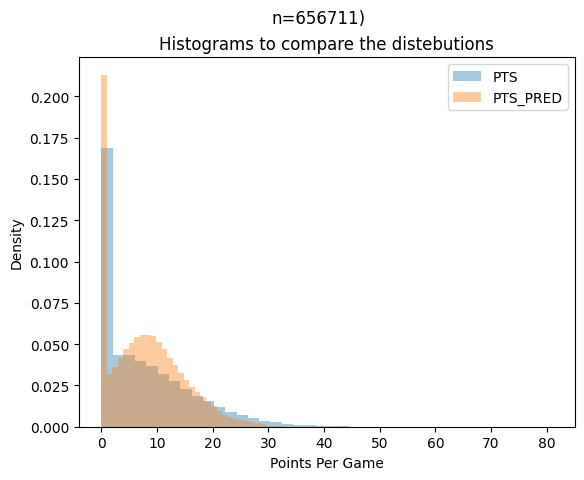

In [506]:
plot_histograms_with_ks(games_details_stats_for_compartion.PTS,games_details_stats_for_compartion.PTS_PRED)

interesting ideas.
As an NBA fan observing the evolution of the game over the last decade, I would first prioritize creating a distinction between different periods of the NBA to reflect how the game has changed. This would involve utilizing both historical data from different seasons and data segmented into specific periods.

Injuries play a significant role in the NBA, not just in terms of whether a player has sustained an injury or is returning from one, but also in how these injuries can fundamentally alter a player’s performance. After an injury, a player might not perform at the same level as before, impacting the accuracy of predictions based on their previous data.

Therefore, it would be crucial to incorporate time-related data and intersect this with more detailed information about the player, if such data is available. This approach would allow for a more nuanced analysis that takes into consideration the temporal dynamics of the sport and individual player conditions, leading to more accurate and reliable predictions.

The model has a couple of areas where it could be improved. First, it has a 'cold start' issue because it relies heavily on historical data. This means it might not perform well at the beginning of a player's data or early in the season when there's not much history to analyze.

Second, while the model uses two main variables (minutes played and assists), there are many other factors that could affect the target value which weren't considered in this version. Including additional variables could potentially make the predictions more accurate and reflective of a player's performance.

Third, the model’s use of binning results in the splitting of historical data, which reduces the amount of 'training' data available for each prediction